In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("/content/train.csv", sep=",")

In [ ]:
df.shape

(2000, 2)

In [ ]:
df.head(5)

,Review,Mark
0,"провайдер ужасный врут всегда,особенно операто...",1
1,Самый тухлый провайдер в мире. Ни о какой стаб...,1
2,"Итак, начал тест на час каждые 5 минут вечером...",1
3,"Никаких нареканий,вообще!Всё быстро доступно,п...",0
4,"у вас один монтажник? мало того, что меня неде...",1


In [ ]:
df["Mark"]

0       1
1       1
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    1
1998    0
1999    1
Name: Mark, Length: 2000, dtype: int64

In [ ]:
df.head(5)

,Review,Mark
0,"провайдер ужасный врут всегда,особенно операто...",1
1,Самый тухлый провайдер в мире. Ни о какой стаб...,1
2,"Итак, начал тест на час каждые 5 минут вечером...",1
3,"Никаких нареканий,вообще!Всё быстро доступно,п...",0
4,"у вас один монтажник? мало того, что меня неде...",1


In [ ]:
df["Mark"].value_counts()

1    1410
0     590
Name: Mark, dtype: int64

In [ ]:
for c in df[df["Mark"] == 1]["Review"].head(5):
    print(c)

провайдер ужасный врут всегда,особенно оператор молодой человек так умничает,будто академию закончил!!!!а толку от его "умности "нет,скорость низкая явно заниженная,и свою вину переваливают на абонента,ушел бы да только конкуренции нет,
Самый тухлый провайдер в мире. Ни о какой стабильности и речи быть не может , заявленной скорости ни разу не наблюдал , постоянные сбои , перепады , отзывчивость тех поддержки тоже "на высоте" . Был бы выбор , без вопросов сменил бы.
Итак, начал тест на час каждые 5 минут вечером в предпраздничный день, вот результаты:
Количество измерений: 	12
Общее время теста в часах: 	1
Средняя скорость: 	795.16 Kбит/сек
не стоит говорить  честности провайдера, всё видно по результатам!
у вас один монтажник? мало того, что меня неделю футболили тех.операторы, ссылаясь на мой ноут, я таскалась по всему городу тестировала у всех ноут(с ним всё в порядке). так теперь ждать монтажника предстоит 8 дней! это нормально? он у вас один на весь город?
Подключился 3 месяца наз

In [ ]:

for c in df[df["Mark"] == 0]["Review"].head(5):
    print(c)

Никаких нареканий,вообще!Всё быстро доступно,практически любые способы оплаты удобные себя даже с мобильного    счета.Подключение в этот же день и очень быстро.
Пользуюсь услугами netbynet уже 9-ый год (раньше вроде по-другому назывались). Отключений практически не было, раз 5-6 может быть. Цены только дешевеют, сейчас плачу 600р за реальные 100 Мбит/с. Гольяново
Лучший провайдер для Новомосковска и окрестностей!!! Регулярно увеличивает скорость!!! Меня вполне устраивает!!! Советую всем!!!
все отлично. свао, южное медведково. тариф 51000/25000. аб.плата 950р. жалоб нет!
Как пользователь Ростелеком-а и работник Технической Поддержки другого оператора связи, хочу Выразить Вам свое уважение и благодарность.
Было бы очень круто попасть к Вам, для обмена опытом, но я так подозреваю Ваши Администраторы сети в Краснодаре? :)

Одно маленькое нарекание, почему-то не отвечаете на письма в ТП из Личного кабинета. Не получается пользоваться вашей приставкой (MAG-250) через IGMP Proxy (запрашивает 

In [ ]:
train_df, test_df = train_test_split(df, test_size=500)

In [ ]:
test_df.shape

(500, 2)

In [ ]:
test_df["Mark"].value_counts()

1    358
0    142
Name: Mark, dtype: int64

In [ ]:
train_df["Mark"].value_counts()

1    1052
0     448
Name: Mark, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
sentence_example = df.iloc[1]["Review"]
tokens = word_tokenize(sentence_example, language="russian")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language="russian")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(f"Исходный текст: {sentence_example}")
print("-----------------")
print(f"Токены: {tokens}")
print("-----------------")
print(f"Токены без пунктуации: {tokens_without_punctuation}")
print("-----------------")
print(f"Токены без пунктуации и стоп слов: {tokens_without_stop_words_and_punctuation}")
print("-----------------")
print(f"Токены после стемминга: {stemmed_tokens}")
print("-----------------")

Исходный текст: Самый тухлый провайдер в мире. Ни о какой стабильности и речи быть не может , заявленной скорости ни разу не наблюдал , постоянные сбои , перепады , отзывчивость тех поддержки тоже "на высоте" . Был бы выбор , без вопросов сменил бы.
-----------------
Токены: ['Самый', 'тухлый', 'провайдер', 'в', 'мире', '.', 'Ни', 'о', 'какой', 'стабильности', 'и', 'речи', 'быть', 'не', 'может', ',', 'заявленной', 'скорости', 'ни', 'разу', 'не', 'наблюдал', ',', 'постоянные', 'сбои', ',', 'перепады', ',', 'отзывчивость', 'тех', 'поддержки', 'тоже', '``', 'на', 'высоте', "''", '.', 'Был', 'бы', 'выбор', ',', 'без', 'вопросов', 'сменил', 'бы', '.']
-----------------
Токены без пунктуации: ['Самый', 'тухлый', 'провайдер', 'в', 'мире', 'Ни', 'о', 'какой', 'стабильности', 'и', 'речи', 'быть', 'не', 'может', 'заявленной', 'скорости', 'ни', 'разу', 'не', 'наблюдал', 'постоянные', 'сбои', 'перепады', 'отзывчивость', 'тех', 'поддержки', 'тоже', '``', 'на', 'высоте', "''", 'Был', 'бы', 'выбор', 

In [ ]:
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [ ]:
tokenize_sentence(sentence_example)

['сам',
 'тухл',
 'провайдер',
 'мир',
 'ни',
 'стабильн',
 'реч',
 'заявлен',
 'скорост',
 'раз',
 'наблюда',
 'постоя',
 'сбо',
 'перепад',
 'отзывчив',
 'тех',
 'поддержк',
 '``',
 'высот',
 "'",
 'был',
 'выбор',
 'вопрос',
 'смен']

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [ ]:
features = vectorizer.fit_transform(df["Review"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, df["Mark"], train_size=0.7, random_state=42)

In [ ]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.75

In [ ]:
train_df["Review"].iloc[0]

'Хай. У\xa0меня вырос пинг с\xa020 до\xa0160-2899 (выше я\xa0не\xa0видел) Будет-ли как-то исправляться эта проблема? Играть невозможно вообще. Звонил раза 3-5 в\xa0тех. поддержку, где кроме как перезагрузить модем дистанционно они ничего не\xa0могут. Пусть Тогда настоящий специалист приезжает за\xa0свой счёт что\xa0бы проверять и\xa0делать какие-то выводы, а\xa0не\xa0те\xa0где девушка по\xa0брошюрке читает что надо говорить клиентам данного интернет провайдера.\n Намерен серьёзно переподключаться к\xa0другому провайдеру. Если на\xa0МГТС ничего не\xa0поменяется. Так как это уже на\xa0протяжении 4-6 месяцев продолжается.'

In [ ]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

In [ ]:
model_pipeline.fit(train_df["Review"], train_df["Mark"])


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7fadaec2ef80>)),
                ('model', LogisticRegression(random_state=0))])

In [ ]:
df

In [ ]:
df = pd.read_csv("/content/reviews_.csv", sep=",")

In [ ]:
model_pipeline.predict(["Оличная скорость все супер"])

array([0])

In [ ]:
providers_neg = {}
providers = {}
t_dict = df.to_dict()
for provider, review in zip(t_dict["Provider"].values(), t_dict["Review"].values()):
  if review != review:
    continue

  if provider in providers:
    providers[provider]+=1
  else:
    providers_neg[provider]=0
    providers[provider]=1

  if model_pipeline.predict([review]) == [1]:
    print('[' + provider + ']')
    print(review)
    providers_neg[provider]+=1
      

Выходные данные были обрезаны до нескольких последних строк (5000).
[Home.net]
По WiMAX не обеспечивают заявленной скорости 6 Мбит/сек, плавает от 2 до 3. Тариф 900 руб./мес. Пинг для онлайн игр приемлемый. Частые обрывы соединений стали последнее время нормой. Техподдержка только составляет заявки, ничего толком сказать не может.
[Акадо]
Снял жилье на Щелковской, нужен был срочно инет.Хотел было подключить выделенку Корбину/Билайн, но нет их в нашем доме.В квартире валялся кабель акадовский. Решил рискнуть, хотя слышал много недоброго про акадо. Решился, тем более проводилась "типа" акция, на три месяца,ну очень дешево.Подключил инет, разумеется вместе "с телевизором"...Обошлось все в 960 рублей. Подключился 27 апреля. На следующий день еду в метро-звонок, думал по работе, ан нет из акадо. Позвонили, что на пробу предлагают мне ДО КОНЦА МЕСЯЦА совершенно бесплатно еще каналы. Было шумно, не все толком понял, но дал добро.Тогда я не знал, что до конца месяца- это ровно два дня...Первог

In [ ]:
providers_neg = dict(sorted(providers_neg.items(), key=lambda x: x[1]))
providers = dict(sorted(providers.items(), key=lambda x: x[1]))
count = 0
result = {}
result_dig = {}
for item in providers:
  if providers_neg[item] == 0 or providers_neg[item] == providers[item]:
    continue
  result_dig[item] = [providers_neg[item], providers[item]]
  result[item] = providers_neg[item] /  providers[item]
  count += providers[item]
result = dict(sorted(result.items(), key=lambda x: x[1]))
df = pd.DataFrame(result.items())
df


,0,1
0,ОнЛайм B2B,0.250000
1,Телеком Центр,0.250000
2,Proxima Network,0.250000
3,Lofis LLC,0.333333
4,iFlat (ЗАО Юнионтел),0.384615
...,...,...
173,Uzonline,0.966667
174,"Ростелеком МРФ ""Юг"" (Ростовский филиал)",0.966667
175,"Ростелеком (Дальсвязь), Ростелеком (Сахателеком)",0.973684
176,Utel,0.977778


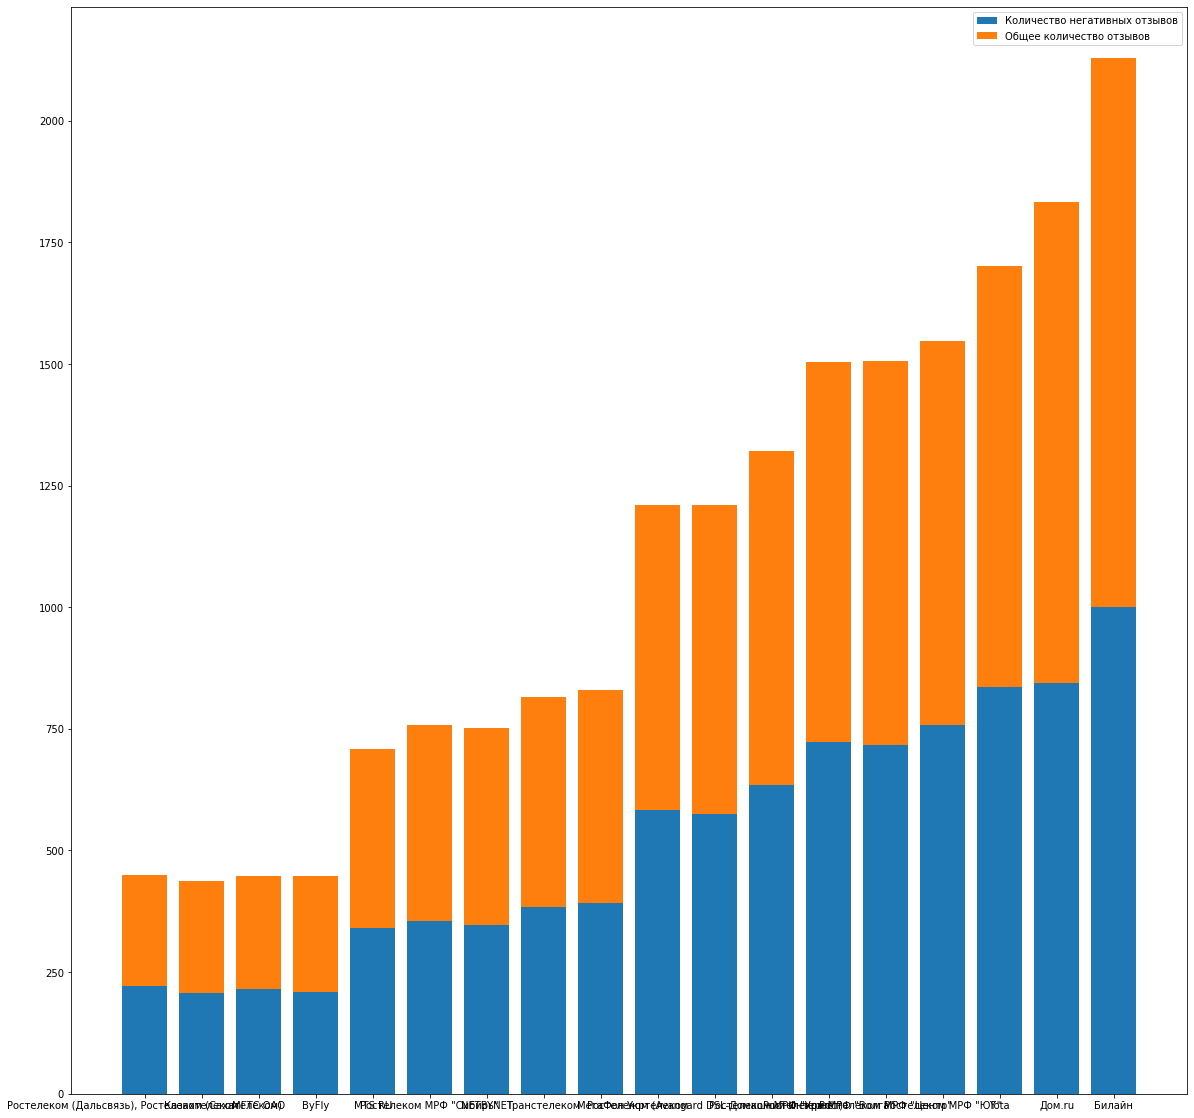

In [174]:
import matplotlib.pyplot as plt
import numpy as np

c = []
v = []      
for key, val in result_dig.items():
    c.append(key)
    v.append(val)
v = np.array(v)

c = c[150:170]
v = v[150:170]

plt.figure(figsize=(20,20))
plt.bar(range(len(c)), v[:,0], label="Количество негативных отзывов")
plt.bar(range(len(c)), v[:,1], bottom=v[:,0], label="Общее количество отзывов")
plt.xticks(range(len(c)), c)
plt.legend()
plt.show()